1. check data 
2. check fiducial features

In [696]:
# segmentation 👌done
# ui tkinter test saved in a separated file ,not preprcessed before 👌done 
# fiducial features 👌done 

In [697]:
# reveiw project and test again  👌done
# save some array in text files to read later for testing ok 👌done
# then tkinter

In [756]:
import os
import numpy as np
import pandas as pd
import scipy.io
import scipy

from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from scipy.signal import butter,filtfilt,savgol_filter

import matplotlib.pyplot as plt
# from scipy import signal
from scipy.signal import butter,filtfilt
import warnings
warnings.filterwarnings('ignore')
import glob
import wfdb as wf

In [757]:
s2=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\chosen\p_156\s0299lre'
s3=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\chosen\p_165\s0322lre'
s5=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\p_174\s0300lre'
s7=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\p_184\s0363lre'
s8=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\p_185\s0336lre'
s9=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\p_198\s0402lre'
s10=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\sub_150\s0287lre'
s13=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\sub260\s0496_re'

In [758]:
import numpy as np
import scipy.signal as signal

def ecg_isoline_drift_correction(ecg_signal, sampling_rate):

    # Apply a high-pass filter to remove baseline wander and DC drift
    b, a = butter(2, 0.5 / (sampling_rate / 2), 'highpass')
    ecg_filtered = filtfilt(b, a, ecg_signal)

    # Estimate the isoelectric line (baseline) using a moving average filter
    window_size = int(sampling_rate * 0.2)  # 200 ms window size
    baseline = savgol_filter(ecg_filtered, window_size, 1)

    # Subtract the estimated baseline from the filtered ECG signal
    ecg_corrected = ecg_filtered - baseline

    return ecg_corrected

In [759]:
def butter_bandbass_filter(Input_signal,low_cutoff,high_cutoff,sampling_rate,order=4):
    nyq=0.5*sampling_rate #nyquist sampling
    low=low_cutoff/nyq
    high=high_cutoff/nyq
    
    numerator,denominator=butter(order,[low,high],btype='band',output='ba',analog=False,fs=None)
    filtered=filtfilt(numerator,denominator,Input_signal)
    
    return filtered

In [760]:
from scipy.signal import find_peaks
def ecg_segmentation(ecg_signal, fs=1000, threshold=0.5):
    # Find R-peaks using a threshold-based approach
    peaks, _ = find_peaks(ecg_signal, height=threshold)

    
    # Calculate the RR intervals
    rr_intervals = np.diff(peaks) / fs

#     # Plot the ECG signal and detected R-peaks
#     time = np.arange(len(ecg_signal)) / fs
#     plt.figure(figsize=(12, 6))
#     plt.plot(time, ecg_signal, 'b', label='ECG Signal')
#     plt.plot(time[peaks], ecg_signal[peaks], 'ro', label='R-Peaks')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude')
#     plt.title('ECG Signal Segmentation')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

    return peaks, rr_intervals

In [761]:
def extract_ecg_segments(ecg_signal, r_peaks, fs=1000, window_size=0.2):
    # Calculate the window size in samples
    window_size_samples = int(window_size * fs)

    # Initialize an empty array to store the segments
    segments = []

    # Loop over the R-peaks and extract the corresponding segments
    for r_peak in r_peaks:
        start = r_peak - window_size_samples // 2
        end = r_peak + window_size_samples // 2
        segment = ecg_signal[start:end]
        segments.append(segment)
#     return np.array(segments)       
#######################
    lens=[len(s) for s in segments]
    max_len=max(lens)

    new_segements=[]
    for s in segments:
        if len(s)==max_len:
            new_segements.append(s)
        else:
            zeros_size=max_len-len(s)
            s=np.append(s,np.zeros(zeros_size))
            new_segements.append(s)
############################    
    
    
    return np.array(new_segements)

In [762]:
def preprocess_using_ACDCT(filtered_signal):
    sig=np.array(filtered_signal)
    AC=sm.tsa.acf(sig,nlags=1000)
    s=AC[0:100]
    DCT=scipy.fftpack.dct(s,type=2)
    
    return DCT

In [763]:
signal_array, fields=wf.rdsamp(s9)
sig = signal_array[:,1]

In [764]:
filtered_signal=butter_bandbass_filter(sig,1,40,sampling_rate=1000,order=4)

In [765]:
ecg_corrected = ecg_isoline_drift_correction(sig, sampling_rate=1000)
r_peaks, rr_intervals = ecg_segmentation(ecg_corrected, fs=1000, threshold=0.7)
segments = extract_ecg_segments(ecg_corrected, r_peaks, fs=1000, window_size=0.7)

Text(0.5, 1.0, 'ecg_corrected signal')

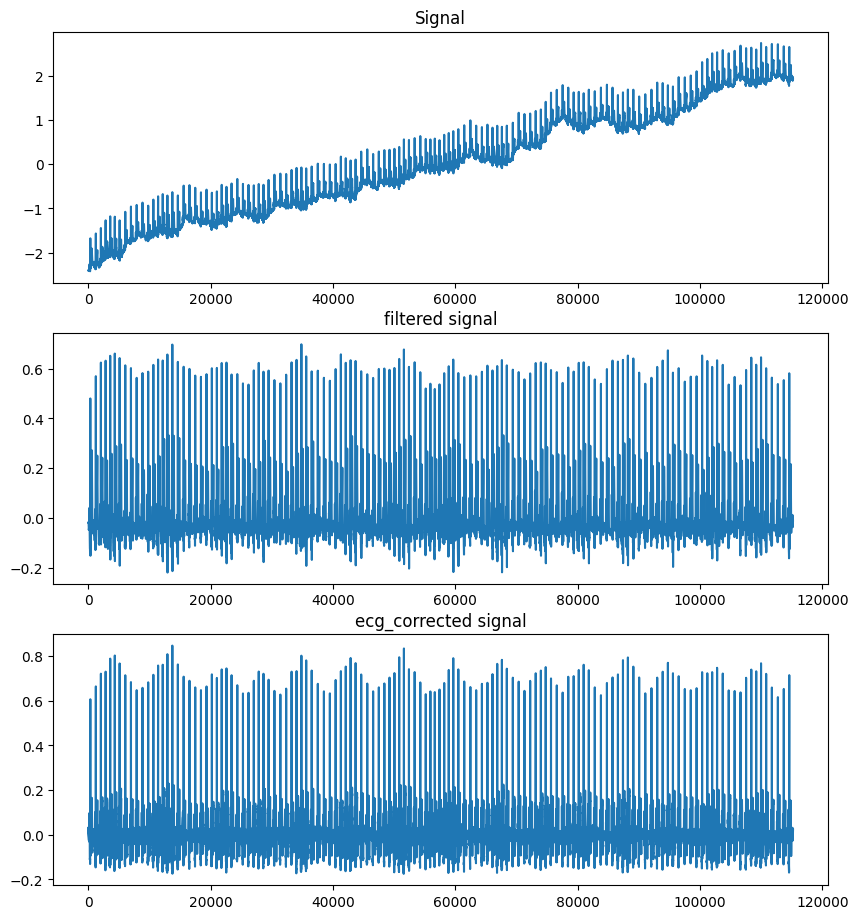

In [766]:
plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
plt.plot(sig)
plt.title('Signal')

plt.subplot(4,1,2)
plt.plot(filtered_signal)
plt.title('filtered signal')

plt.subplot(4,1,3)
plt.plot(ecg_corrected)
plt.title('ecg_corrected signal')

Text(0.5, 1.0, 'one Segment')

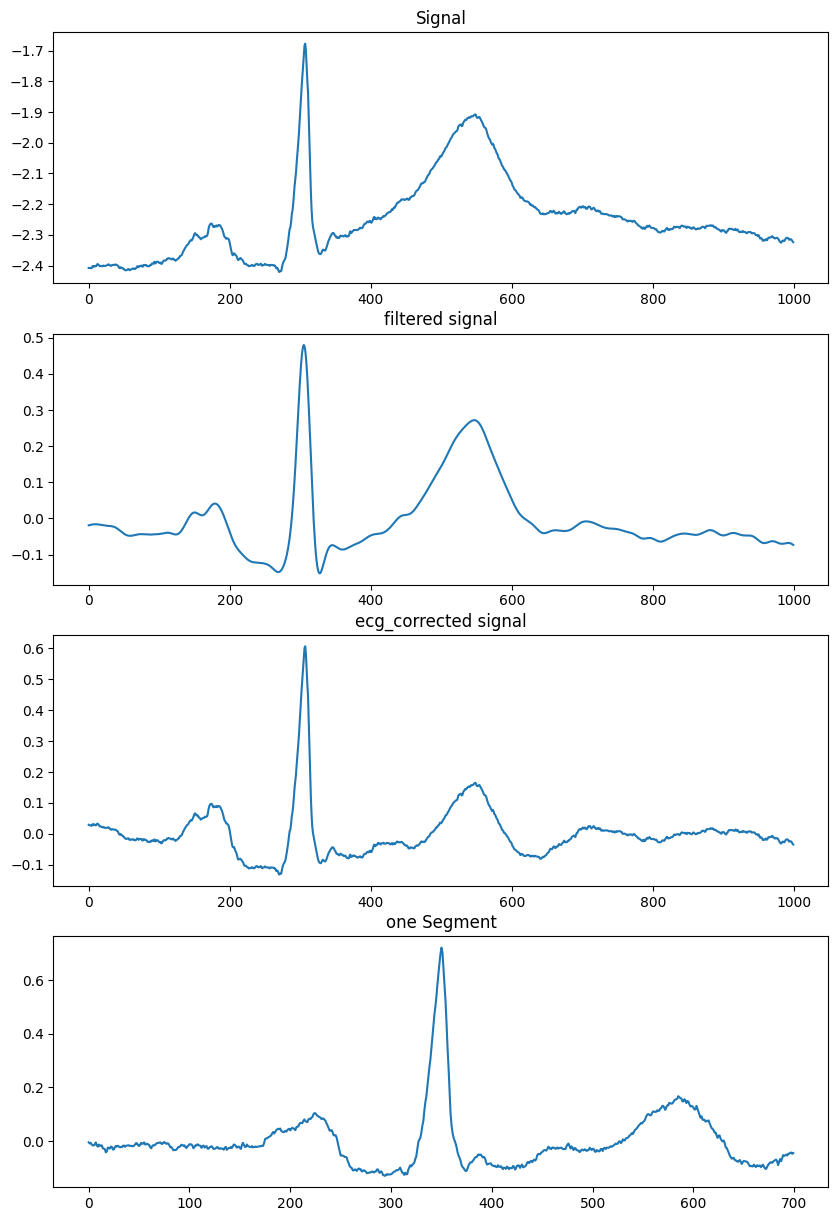

In [767]:
plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
plt.plot(sig[0:1000])
plt.title('Signal')

plt.subplot(4,1,2)
plt.plot(filtered_signal[0:1000])
plt.title('filtered signal')

plt.subplot(4,1,3)
plt.plot(ecg_corrected[0:1000])
plt.title('ecg_corrected signal')

plt.subplot(4,1,4)
plt.plot(segments[0])
plt.title('one Segment')

# primary for the whole signal 

# start project code

In [768]:
files=[s2,s5,s13,s9,]#s8
# [s2,s3,s5,s7,s9,s10,s8,s13]#are the best after long analysis
files

['F:\\mohamed\\4th_year_new\\Semester 2\\HCI\\Project\\ptb diagnostic healthy subs\\chosen\\p_156\\s0299lre',
 'F:\\mohamed\\4th_year_new\\Semester 2\\HCI\\Project\\ptb diagnostic healthy subs\\p_174\\s0300lre',
 'F:\\mohamed\\4th_year_new\\Semester 2\\HCI\\Project\\ptb diagnostic healthy subs\\sub260\\s0496_re',
 'F:\\mohamed\\4th_year_new\\Semester 2\\HCI\\Project\\ptb diagnostic healthy subs\\p_198\\s0402lre']

In [769]:
data={}
for idx,sub in enumerate(files):
    signal_array, fields=wf.rdsamp(sub)
    sig = signal_array[:,1]
    sname=f"sub_{idx+1}"
    data[sname]=sig

In [770]:
data

{'sub_1': array([ 0.2265,  0.218 ,  0.215 , ..., -0.4795, -0.4835, -0.485 ]),
 'sub_2': array([ 0.0235,  0.0245,  0.027 , ..., -0.2265, -0.228 , -0.233 ]),
 'sub_3': array([-0.3835, -0.386 , -0.3865, ...,  0.346 ,  0.3475,  0.343 ]),
 'sub_4': array([-2.408 , -2.408 , -2.4085, ...,  1.904 ,  1.9085,  1.9155])}

# split data to get newtest unseen data
train =[:80000]

test =[80000:85000]


In [771]:
# save testing
new_test={}
for key ,sig in data.items():
    new_test[key]=sig[80000:90000]
    np.savetxt(f'{key}_test_segment.txt',sig[80000:90000])

In [772]:
def preprocessing_general(sig):
    ecg_corrected = ecg_isoline_drift_correction(sig, sampling_rate=1000)

    r_peaks, rr_intervals = ecg_segmentation(ecg_corrected, fs=1000, threshold=0.7)
    segments = extract_ecg_segments(ecg_corrected, r_peaks, fs=1000, window_size=0.7)
    return segments

In [773]:
segments_dict={}
for key ,sig in data.items():
    print(key,sig)
    segments = preprocessing_general(sig)
    segments_dict[key] = segments[2:52]

sub_1 [ 0.2265  0.218   0.215  ... -0.4795 -0.4835 -0.485 ]
sub_2 [ 0.0235  0.0245  0.027  ... -0.2265 -0.228  -0.233 ]
sub_3 [-0.3835 -0.386  -0.3865 ...  0.346   0.3475  0.343 ]
sub_4 [-2.408  -2.408  -2.4085 ...  1.904   1.9085  1.9155]


In [774]:
# fs = 1000
# cutoff_low = 1
# cutoff_high = 40
# nyquist = fs / 2
# level = int(np.floor(np.log2(nyquist/cutoff_low)))
# level

In [775]:
def preprocess_using_ACDCT(filtered_signal):
    sig=np.array(filtered_signal)
    AC=sm.tsa.acf(sig,nlags=1000)
    s=AC[0:100]
    DCT=scipy.fftpack.dct(s,type=2)
    
    return DCT

- We have extracted fiducial features related to QRS complex using Tompkin’s algorithm. The reason to select features related to only QRS complex is that QRS complex is considered to be fairly constant and doesn’t change with the change of heart rate as it reflects the depolarization of ventricular muscle

https://web.archive.org/web/20160911023941/http://ijarcsse.com/docs/papers/Volume_5/7_July2015/V5I6-0385.pdf

In [776]:
from fiducial_features import pan_tompkins
def preprocess_using_fiducial(filtered_signal):
    
    features=pan_tompkins(filtered_signal)
    return features

In [777]:
# according to the paper
    # db8,level 5
    # Daubechies sym7
# https://accentsjournals.org/PaperDirectory/Journal/IJACR/2020/3/3.pdf

In [778]:
def preprocess_using_wavelet(filtered_signal):  
    import pywt
    from pywt import wavedec ,waverec

    wavelet = 'db8'
    level = 5
    
    # db8,level 5
    # Daubechies sym7
    coeffs = pywt.wavedec(filtered_signal, wavelet, level=level)
    
    for i in range(1, level):
        coeffs[i] = np.zeros_like(coeffs[i])

    res = pywt.waverec(coeffs, wavelet)
    return res

In [779]:
def get_features_general(signal,type_):
    
    """
    # type_=1:use wavelet
    # type_=2:use fiducial_features
    # type_=3:use AC/DCT
    
    """
#     butterworth filter 2-40  or 2 -50 
#     sr=1000
    filtered_signal=butter_bandbass_filter(signal,low_cutoff=2,high_cutoff=40,sampling_rate=1000,order=4)
    
#     Features extraction using AC/DCT 
    
    if type_==1:
        features=preprocess_using_wavelet(filtered_signal)
    elif type_==2:
        features=preprocess_using_fiducial(filtered_signal)
    elif type_==3:
        features=preprocess_using_ACDCT(filtered_signal)
    
    return features

In [780]:
def get_sub(idx):
    return f'subject_{idx+1}'

In [837]:
labels=[]
final_data=[]
type_=2
for key ,sig in segments_dict.items():
    for s in sig:
        s=get_features_general(s,type_)
        labels.append(key)
        final_data.append(s)

final_data=np.vstack(final_data)

labels=np.array(labels)

final_data

array([[-3.19047981e-01,  7.73661597e-01,  6.00000000e+02, ...,
         5.60000000e+01, -3.46709150e-01,  2.50000000e+01],
       [-3.39761015e-01,  7.49695631e-01,  6.00000000e+02, ...,
         7.50000000e+01, -3.46374310e-01,  5.00000000e+00],
       [-3.26785652e-01,  7.86548048e-01,  6.00000000e+02, ...,
         7.40000000e+01, -3.38003651e-01,  6.00000000e+00],
       ...,
       [-9.57151035e-02,  5.25692532e-02,  6.00000000e+02, ...,
         7.40000000e+01, -1.01906692e-01,  1.10000000e+01],
       [-8.24529068e-02,  5.70744820e-02,  6.00000000e+02, ...,
         7.10000000e+01, -9.66877682e-02,  1.30000000e+01],
       [-8.17499673e-02,  6.03649349e-02,  6.00000000e+02, ...,
         6.10000000e+01, -9.83816463e-02,  1.50000000e+01]])

# split data into train and test

In [838]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(final_data,labels, test_size=0.20,stratify=labels,shuffle=True,random_state=42)

lb=LabelEncoder()

y_train=lb.fit_transform(y_train)
y_test=lb.transform(y_test)

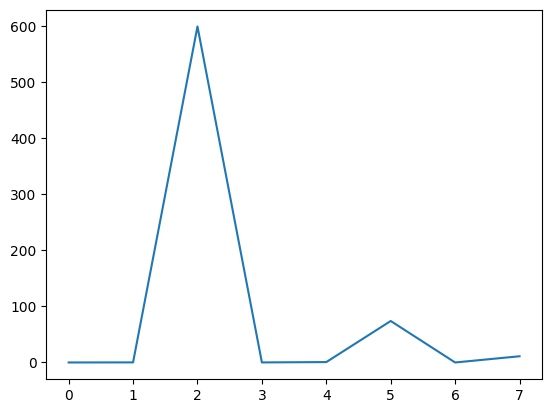

In [839]:
plt.plot(X_train[10])

In [840]:
y_train.shape

(160,)

In [841]:
y_train[:10]

array([1, 3, 3, 1, 3, 0, 2, 2, 2, 0], dtype=int64)

# SVM

In [842]:
from sklearn import svm
from sklearn.metrics import accuracy_score ,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [843]:
svm_classifier = svm.SVC(kernel='linear') # Linear Kernel

svm_classifier.fit(X=X_train,y=y_train)

pred=svm_classifier.predict(X_test)

print("Accuracy = {} % ".format(accuracy_score(y_test,pred)*100))

Accuracy = 97.5 % 


In [844]:
print(classification_report(y_test,pred,target_names=pd.unique(labels)))

              precision    recall  f1-score   support

       sub_1       1.00      1.00      1.00        10
       sub_2       0.91      1.00      0.95        10
       sub_3       1.00      0.90      0.95        10
       sub_4       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



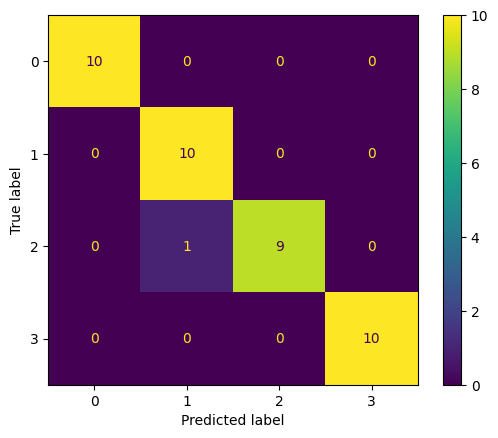

In [845]:
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

# LogisticRegression

In [856]:
from sklearn.linear_model import LogisticRegression

LR_classifier=LogisticRegression(max_iter=1000)

LR_classifier.fit(X=X_train,y=y_train)

pred=LR_classifier.predict(X_test)

print("Accuracy = {} % ".format(accuracy_score(y_test,pred)*100))

Accuracy = 97.5 % 


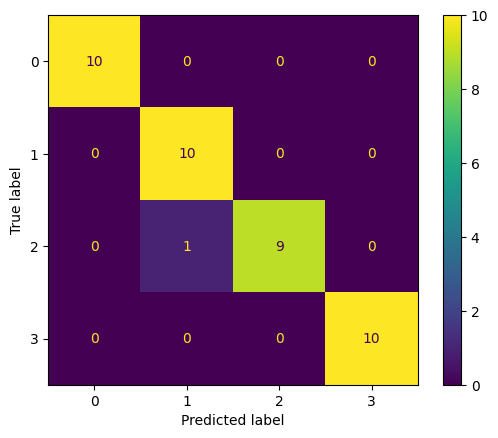

In [847]:
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

# LDA

In [848]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [849]:
LDA_classifier=LinearDiscriminantAnalysis()

LDA_classifier.fit(X=X_train,y=y_train)

pred=LDA_classifier.predict(X_test)

print("Accuracy = {} % ".format(accuracy_score(y_test,pred)*100))

Accuracy = 100.0 % 


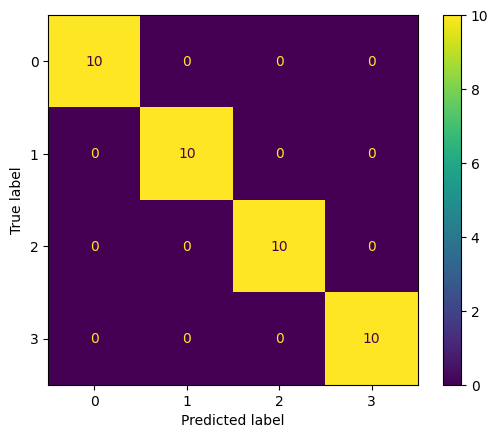

In [850]:
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

# saving models

In [753]:
# type_=1:use wavelet
# type_=2:use fiducial_features
# type_=3:use AC/DCT

In [754]:
import pickle

In [755]:
if type_==1:
     pickle.dump(LDA_classifier,open('LDA_classifier_wavelet.pkl','wb'))
# fiducial 
elif type_==2:
    pickle.dump(LDA_classifier,open('LDA_classifier_fiducial.pkl','wb'))
else:
    pickle.dump(LDA_classifier,open('LDA_classifier_ACDCT.pkl','wb'))    

# Loading and Testing

In [618]:
path='sub_4_test_segment.txt' 
to_test = np.loadtxt(path)

In [619]:
to_test.shape

(10000,)

In [620]:
if type_==1:
    loaded_model=pickle.load(open('LDA_classifier_wavelet.pkl','rb'))
# fiducial 
elif type_==2:
    loaded_model=pickle.load(open('LDA_classifier_fiducial.pkl','rb'))
else:
    loaded_model=pickle.load(open('LDA_classifier_ACDCT.pkl','rb'))

In [621]:
loaded_model.n_features_in_

700

In [622]:
to_test.shape

(10000,)

In [623]:
to_test=preprocessing_general(to_test)

In [624]:
to_test.shape

(8, 700)

In [625]:
to_test=to_test[2]

In [626]:
test=get_features(to_test,type_)

In [627]:
test=np.array(test)
test.shape

(700,)

In [628]:
def prep_type(type_):
    if type_==1:
        return 'wavelet'
    elif type_==2:
        return 'fiducial_features'
    else:
        return 'AC/DCT'
# type_=1:use wavelet
# type_=2:use fiducial_features
# type_=3:use AC/DCT


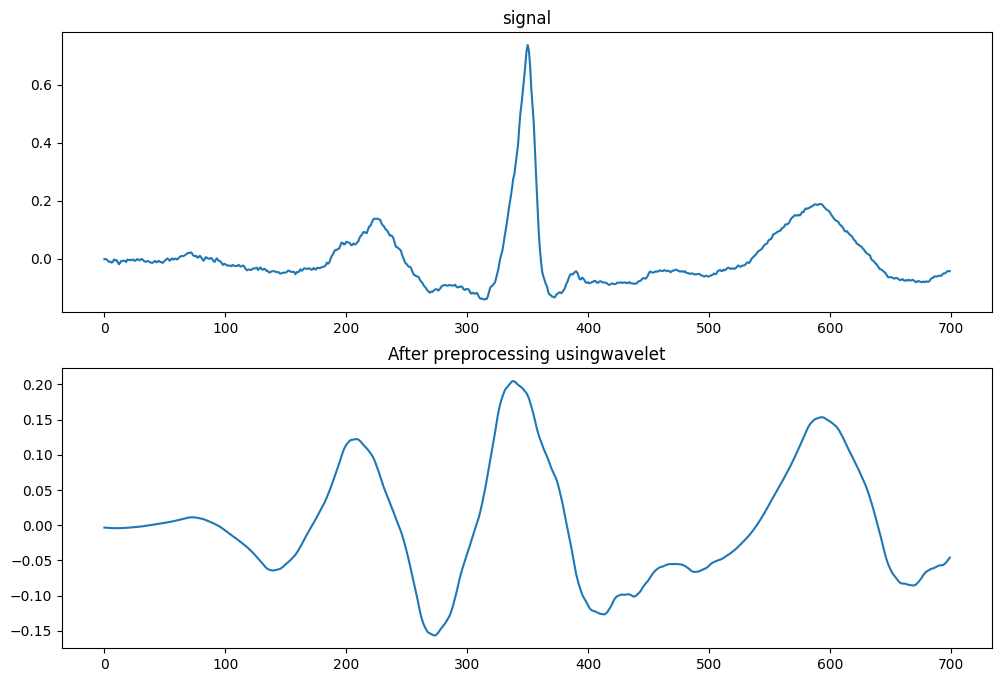

In [629]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.title('signal')
plt.plot(to_test)

plt.subplot(2,1,2)
# plt.title(f'After preprocessing using{prep_type(type_)}')
# plt.plot(test[0])

if type_==2:
    plt.title(f'After preprocessing using{prep_type(type_)}')
    plt.plot(test[0])

else:
    
    plt.title(f'After preprocessing using{prep_type(type_)}')
    plt.plot(test)

In [630]:
if type_ !=2:
    test=np.expand_dims(test,axis=0)
print('test shape after ',test.shape)
test.shape

test shape after  (1, 700)


(1, 700)

In [631]:
pred=loaded_model.predict(test)

pred[0]

3

In [632]:
get_sub(pred[0])

'subject_4'

In [251]:
# using fiducial featues 

# svm 100%
# LR 75%
# LDA 100%

# using wavelet featues 

# svm 100%

# LR 100% 

# LDA  100%

# using AC/DCT featues 

# svm   100%

# LR   100%

# LDA   100%


In [ ]:
import numpy as np
from statsmodels.graphics import tsaplots
from scipy.signal import butter,filtfilt,savgol_filter
from scipy.signal import find_peaks

import statsmodels.api as sm
import scipy.io
import scipy
import matplotlib.pyplot as plt


def ecg_isoline_drift_correction(ecg_signal, sampling_rate):

    # Apply a high-pass filter to remove baseline wander and DC drift
    b, a = butter(2, 0.5 / (sampling_rate / 2), 'highpass')
    ecg_filtered = filtfilt(b, a, ecg_signal)

    # Estimate the isoelectric line (baseline) using a moving average filter
    window_size = int(sampling_rate * 0.2)  # 200 ms window size
    baseline = savgol_filter(ecg_filtered, window_size, 1)

    # Subtract the estimated baseline from the filtered ECG signal
    ecg_corrected = ecg_filtered - baseline

    return ecg_corrected

def butter_bandbass_filter(Input_signal,low_cutoff,high_cutoff,sampling_rate,order=4):
    nyq=0.5*sampling_rate #nyquist sampling
    low=low_cutoff/nyq
    high=high_cutoff/nyq
    
    numerator,denominator=butter(order,[low,high],btype='band',output='ba',analog=False,fs=None)
    filtered=filtfilt(numerator,denominator,Input_signal)
    
    return filtered


def ecg_segmentation(ecg_signal, fs=1000, threshold=0.5):
    # Find R-peaks using a threshold-based approach
    peaks, _ = find_peaks(ecg_signal, height=threshold)

    
    # Calculate the RR intervals
    rr_intervals = np.diff(peaks) / fs

#     # Plot the ECG signal and detected R-peaks
#     time = np.arange(len(ecg_signal)) / fs
#     plt.figure(figsize=(12, 6))
#     plt.plot(time, ecg_signal, 'b', label='ECG Signal')
#     plt.plot(time[peaks], ecg_signal[peaks], 'ro', label='R-Peaks')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude')
#     plt.title('ECG Signal Segmentation')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

    return peaks, rr_intervals

def extract_ecg_segments(ecg_signal, r_peaks, fs=1000, window_size=0.2):
    # Calculate the window size in samples
    window_size_samples = int(window_size * fs)

    # Initialize an empty array to store the segments
    segments = []

    # Loop over the R-peaks and extract the corresponding segments
    for r_peak in r_peaks:
        start = r_peak - window_size_samples // 2
        end = r_peak + window_size_samples // 2
        segment = ecg_signal[start:end]
        segments.append(segment)
#     return np.array(segments)       
#######################
    lens=[len(s) for s in segments]
    max_len=max(lens)

    new_segements=[]
    for s in segments:
        if len(s)==max_len:
            new_segements.append(s)
        else:
            zeros_size=max_len-len(s)
            s=np.append(s,np.zeros(zeros_size))
            new_segements.append(s)
############################    
    
    
    return np.array(new_segements)

def preprocess_using_ACDCT(filtered_signal):
    sig=np.array(filtered_signal)
    AC=sm.tsa.acf(sig,nlags=1000)
    s=AC[0:100]
    DCT=scipy.fftpack.dct(s,type=2)
    
    return DCT


from fiducial_features import pan_tompkins
def preprocess_using_fiducial(filtered_signal):
    
    features=pan_tompkins(filtered_signal)
    return features

def preprocess_using_wavelet(filtered_signal):  
    import pywt
    from pywt import wavedec ,waverec

    wavelet = 'db4'
    level = 4
    coeffs = pywt.wavedec(filtered_signal, wavelet, level=level)
    
    for i in range(1, level):
        coeffs[i] = np.zeros_like(coeffs[i])

    res = pywt.waverec(coeffs, 'db4')
    return res



def preprocessing_general(sig):
    ecg_corrected = ecg_isoline_drift_correction(sig, sampling_rate=1000)

    r_peaks, rr_intervals = ecg_segmentation(ecg_corrected, fs=1000, threshold=0.7)
    segments = extract_ecg_segments(ecg_corrected, r_peaks, fs=1000, window_size=0.7)
    return segments

def get_features_general(signal,type_):
    
    """
    # type_=1:use wavelet
    # type_=2:use fiducial_features
    # type_=3:use AC/DCT
    
    """
#     butterworth filter 2-40  or 2 -50 
#     sr=1000
    filtered_signal=butter_bandbass_filter(signal,low_cutoff=2,high_cutoff=40,sampling_rate=1000,order=4)
    
#     Features extraction using AC/DCT 
    
    if type_==1:
        features=preprocess_using_wavelet(filtered_signal)
    elif type_==2:
        features=preprocess_using_fiducial(filtered_signal)
    elif type_==3:
        features=preprocess_using_ACDCT(filtered_signal)
    
    return features

